# *Aya Shibbi -- Senior Project - 2024*

# **Voice-To-Text Emotion Detection**
*Unbalanced + Lemmatized Text*

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# unbalanced - lemmatized text
my_csv_lem = "/content/drive/MyDrive/AyaShibbi_SeniorProject_2024_LIU/Part2_Emotion_Detection/Datasets/Unbalanced/Preprocessed_Text/unbalanced_lemmatized_text_ds.csv"

Mounted at /content/drive


In [2]:
# install toolkit
!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from wordcloud import WordCloud
from collections import Counter

In [4]:
# load the nonlemmatized dataset from the CSV file into a pandas DataFrame
csv_lem = pd.read_csv(my_csv_lem)
df_lem = pd.DataFrame(csv_lem)

## **2. Emotion Detection**

### Exploratory Data Analysis (EDA)

In [5]:
# view all data in the dataframe
print(df_lem)

                                                    text  label description  \
0                                i didnt feel humiliated      0         sad   
1      i can go from feeling so hopeless to so damned...      0         sad   
2       im grabbing a minute to post i feel greedy wrong      3       anger   
3      i am ever feeling nostalgic about the fireplac...      2        love   
4                                   i am feeling grouchy      3       anger   
...                                                  ...    ...         ...   
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                                            cleaned

In [6]:
# information about the data
print(df_lem.info)

<bound method DataFrame.info of                                                     text  label description  \
0                                i didnt feel humiliated      0         sad   
1      i can go from feeling so hopeless to so damned...      0         sad   
2       im grabbing a minute to post i feel greedy wrong      3       anger   
3      i am ever feeling nostalgic about the fireplac...      2        love   
4                                   i am feeling grouchy      3       anger   
...                                                  ...    ...         ...   
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                   

In [7]:
# view columns
print(df_lem.columns)

Index(['text', 'label', 'description', 'cleaned_text', 'filtered_text',
       'lemmatized_text'],
      dtype='object')


In [8]:
# number of records and features
print(df_lem.shape)

(16000, 6)


In [9]:
# number of null values
print(df_lem.isnull().sum())

text               0
label              0
description        0
cleaned_text       0
filtered_text      0
lemmatized_text    0
dtype: int64


In [10]:
# view first 5 rows
print(df_lem.head())

                                                text  label description  \
0                            i didnt feel humiliated      0         sad   
1  i can go from feeling so hopeless to so damned...      0         sad   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                        cleaned_text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                       filtered_text  \
0                              didnt feel humiliated   
1  go feeling hopeless damned hopeful around some...   
2          im grabbing minute post feel gree

In [11]:
# view last 5 rows
print(df_lem.tail())

                                                    text  label description  \
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                                            cleaned_text  \
15995  i just had a very brief time in the beanbag an...   
15996  i am now turning and i feel pathetic that i am...   
15997                     i feel strong and good overall   
15998  i feel like this was such a rude comment and i...   
15999  i know a lot but i feel so stupid because i ca...   

                                           filtered_text  \
15995      brief time beanbag said anna feel like beaten   
15996  turning feel pathetic still waiting t

In [12]:
# average word count
average_word_count = df_lem['lemmatized_text'].str.split().str.len().mean()
print(f"Average Word Count per Text: {average_word_count:.2f}")

Average Word Count per Text: 9.33


In [13]:
# emotion distribution
number_emotion_distribution = df_lem['description'].value_counts()
percentage_emotion_distribution = df_lem['description'].value_counts(normalize = True)

print(number_emotion_distribution) # numbers
print("-" * 30)
print(percentage_emotion_distribution) # percentages

description
joy         5362
sad         4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
------------------------------
description
joy         0.335125
sad         0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: proportion, dtype: float64


#### Emotion Distribution Visualization

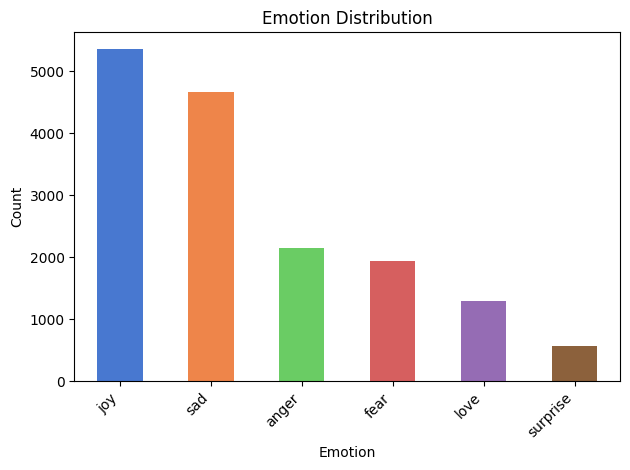

In [14]:
# create the bar chart
number_emotion_distribution.plot(kind='bar', color=sns.color_palette("muted"))
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()

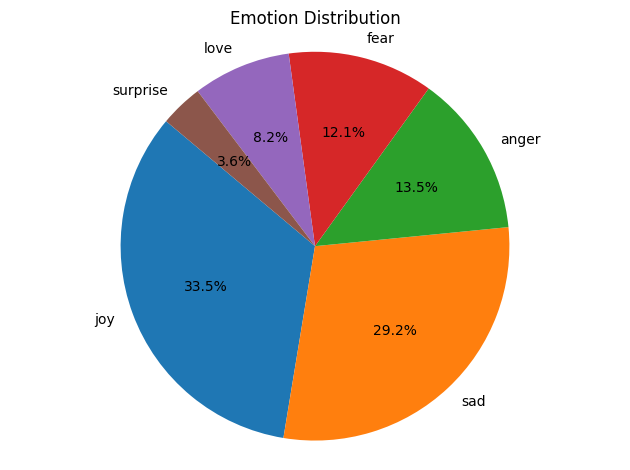

In [15]:
# create the pie chart
plt.pie(percentage_emotion_distribution, labels=percentage_emotion_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Emotion Distribution")
plt.axis('equal')  # equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

#### Overall Text Length Distribution

In [16]:
# text length for each text (count characters)
text_lengths = df_lem['lemmatized_text'].str.len()

print(text_lengths[:5])

0    20
1    60
2    37
3    52
4    15
Name: lemmatized_text, dtype: int64


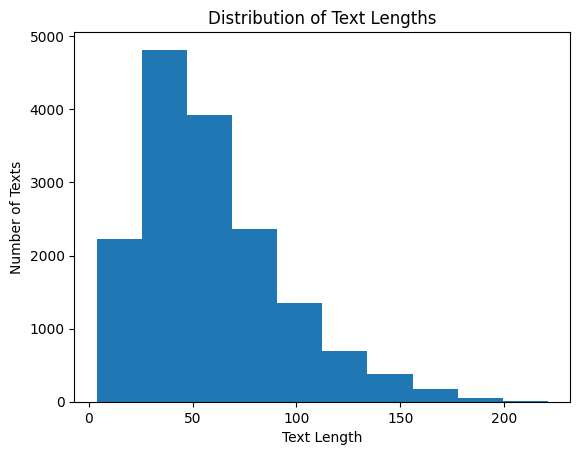

In [17]:
# Create the histogram
plt.hist(text_lengths)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths")
plt.show()

In [18]:
# print the mean text length (count characters)
mean_text_length = text_lengths.mean()
print(f"Mean Text Length: {mean_text_length:.2f}")

Mean Text Length: 59.29


<ipython-input-19-2af9cc181816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


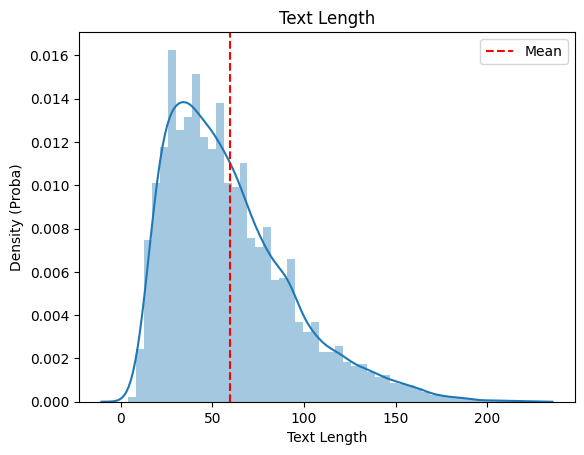

In [19]:
# Create the distplot of Text Length
sns.distplot(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Density (Proba)')
plt.title('Text Length')
plt.axvline(mean_text_length, color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.show()

#### Word Frequency Per Text

In [20]:
# find the text length and word count of each record
text_word_count = df_lem['lemmatized_text'].apply(lambda x: len(str(x).split())) # words

print(text_word_count[:5])

0    3
1    9
2    7
3    7
4    2
Name: lemmatized_text, dtype: int64


In [21]:
# print the mean text word count
mean_text_word_count = text_word_count.mean()
print(f"Mean Text Word Count: {mean_text_word_count:.2f}")

Mean Text Word Count: 9.33


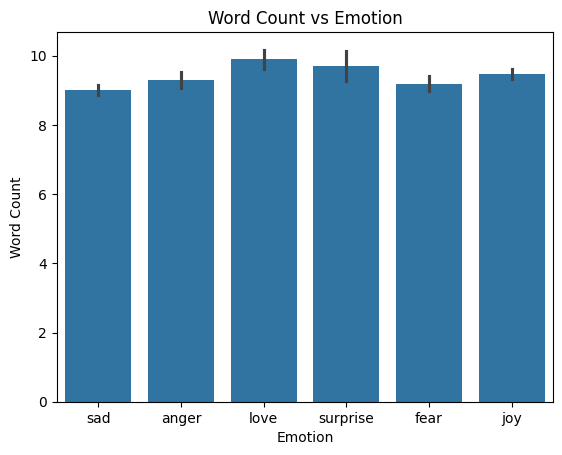

In [22]:
# Create the barplot of Text Word Count
sns.barplot(x = df_lem['description'], y = text_word_count)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.title('Word Count vs Emotion')
plt.show()

#### **Tokenization**

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
# tokenization
tokenized_text = []

for sentence in df_lem['lemmatized_text']:
  tokens = nltk.word_tokenize(sentence)
  tokenized_text.append(tokens)

print(tokenized_text[:5])

[['didnt', 'feel', 'humiliate'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'care', 'awake'], ['im', 'grab', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]


#### Word Frequency vs. Emotion

In [25]:
from collections import Counter
def get_word_frequencies(text_list):
  word_counts = Counter()
  for text in text_list:
    word_counts.update(text)
  return word_counts

# Get word frequencies for all text
word_freqs = get_word_frequencies(tokenized_text)

print(word_freqs)

Counter({'feel': 11506, 'feeling': 5455, 'like': 2993, 'im': 2430, 'get': 1079, 'make': 1065, 'know': 975, 'time': 974, 'really': 942, 'want': 867, 'little': 736, 'love': 728, 'day': 675, 'thing': 672, 'people': 664, 'one': 647, 'would': 646, 'go': 611, 'think': 609, 'life': 605, 'still': 597, 'ive': 587, 'even': 568, 'say': 535, 'way': 528, 'need': 521, 'bit': 521, 'something': 513, 'much': 496, 'going': 489, 'dont': 482, 'could': 453, 'try': 410, 'back': 410, 'good': 401, 'see': 400, 'pretty': 395, 'work': 384, 'always': 355, 'right': 353, 'come': 353, 'start': 346, 'friend': 340, 'also': 337, 'year': 336, 'today': 332, 'take': 321, 'around': 315, 'help': 307, 'cant': 301, 'look': 294, 'well': 279, 'though': 274, 'didnt': 272, 'felt': 266, 'lot': 264, 'never': 264, 'thought': 262, 'someone': 259, 'every': 254, 'tell': 254, 'happy': 250, 'le': 248, 'enough': 238, 'quite': 238, 'week': 236, 'sure': 232, 'many': 232, 'find': 231, 'kind': 226, 'away': 226, 'home': 225, 'ever': 221, 'anyt

In [26]:
# Group words by emotion
emotion_word_freqs = {}
for emotion in df_lem['description'].unique():
  df_emotion = df_lem[df_lem['description'] == emotion]
  emotion_word_freqs[emotion] = get_word_frequencies(tokenized_text)

# Prepare data for visualization (adjust based on your needs)
top_n_words = 10  # Number of top words to visualize
emotions = list(emotion_word_freqs.keys())

word_data = []
for emotion, word_freq in emotion_word_freqs.items():
  top_words = word_freq.most_common(top_n_words)  # Get top words for this emotion
  word_data.append([word for word, _ in top_words])  # Extract just words

In [27]:
from wordcloud import WordCloud

# Create word clouds for each emotion
for emotion, word_freq in emotion_word_freqs.items():
  word_cloud = WordCloud(width=800, height=600).generate_from_frequencies(word_freq)
  plt.figure(figsize=(8, 6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {emotion} Text')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### N-Gram Analysis

In [28]:
# creating individual dataframes of different emotions
sadness = df_lem[df_lem['label']==0]['lemmatized_text']
joy = df_lem[df_lem['label']==1]['lemmatized_text']
love = df_lem[df_lem['label']==2]['lemmatized_text']
anger = df_lem[df_lem['label']==3]['lemmatized_text']
fear = df_lem[df_lem['label']==4]['lemmatized_text']
surprise = df_lem[df_lem['label']==5]['lemmatized_text']

In [29]:
# code to calculate ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

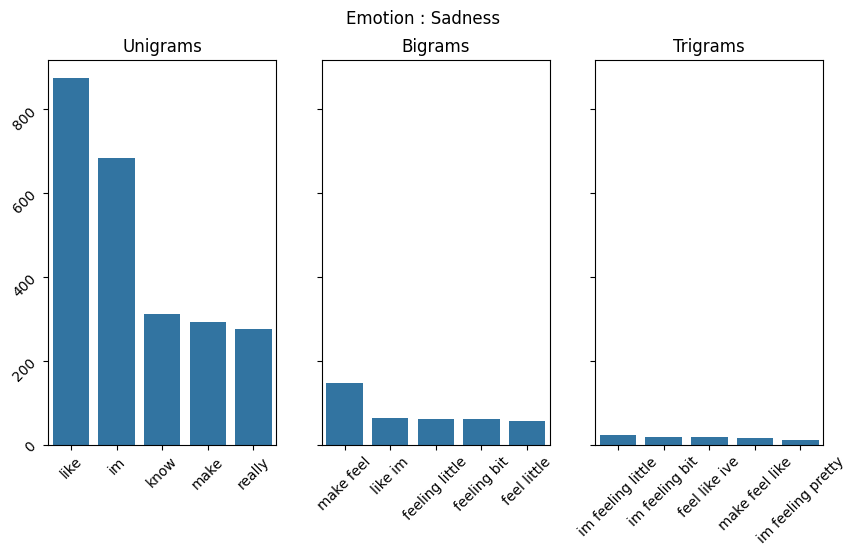

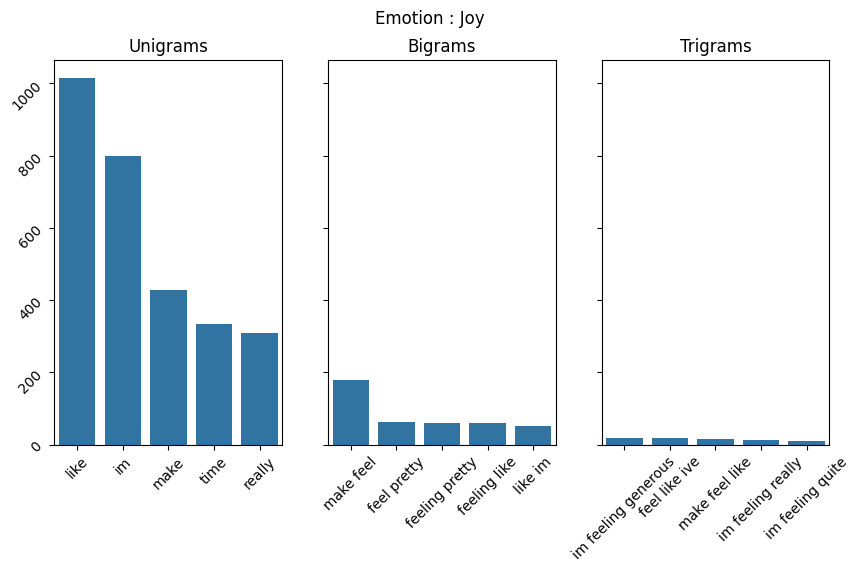

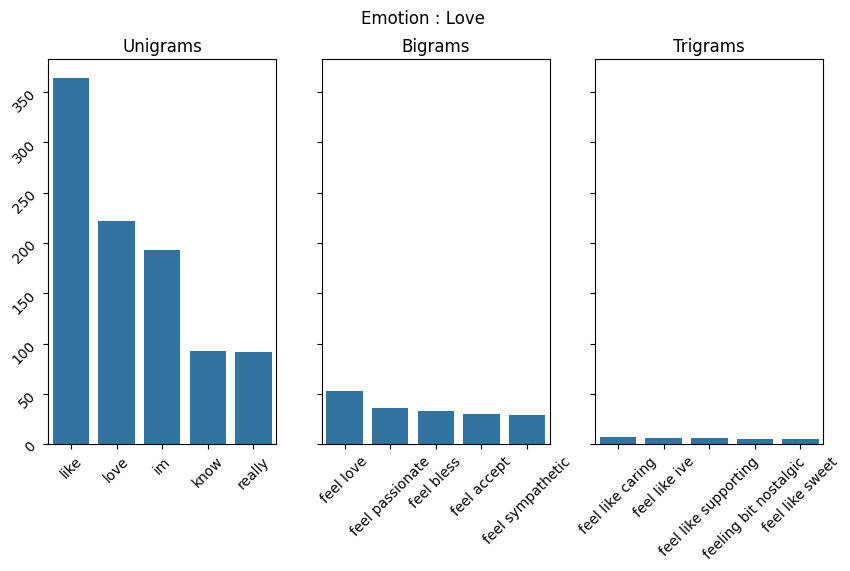

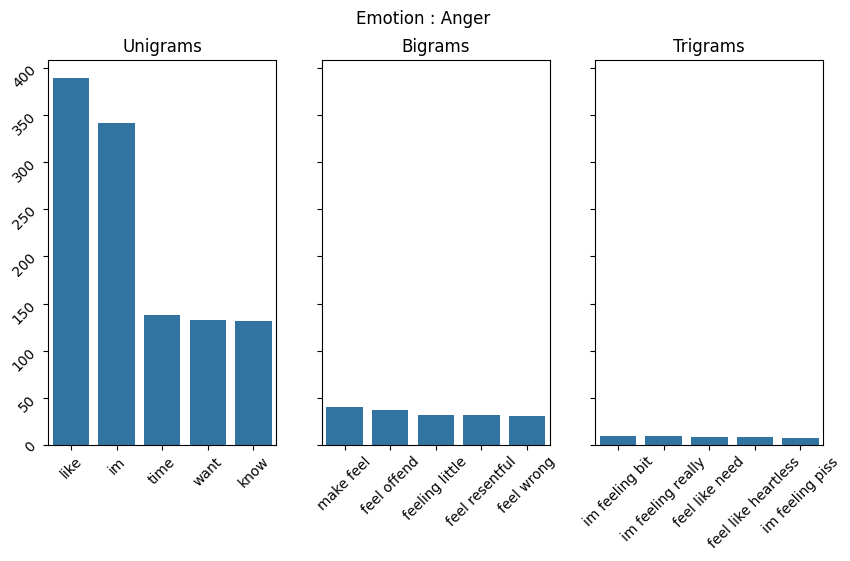

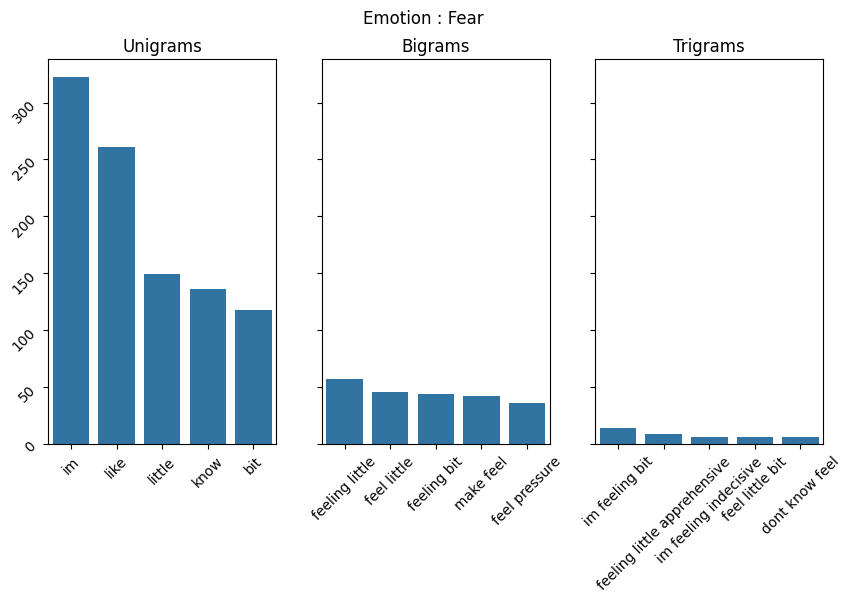

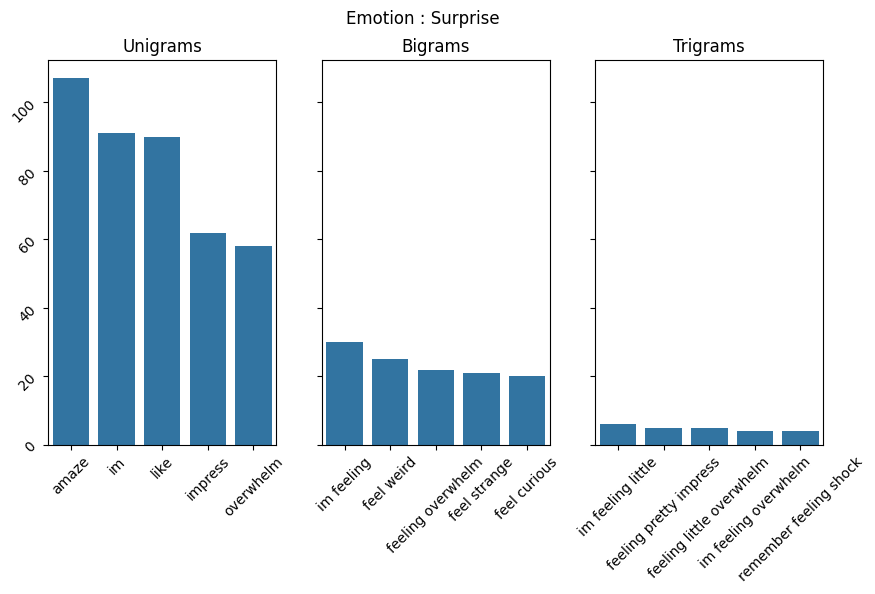

In [31]:
# visualizing the ngrams for the emotions
#Sadness
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Fear
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('fear.png')


#Surprise
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('suprise.png')

### **Vectorization (convert text to numerical values)**

In [32]:
lemmatized_text_data = df_lem['lemmatized_text']

#### CountVectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# unigram --> 1
countVectorizer_n1 = CountVectorizer()

In [35]:
# unigram & bigram --> 1 & 2
countVectorizer_n2 = CountVectorizer(ngram_range= (1,2))

In [36]:
# bigram --> 2
countVectorizer_n3 = CountVectorizer(ngram_range= (2,2))

##### Unigram

In [37]:
countVectorizer_n1.fit(lemmatized_text_data)
X_CV_n1_lem = countVectorizer_n1.transform(lemmatized_text_data)

print(X_CV_n1_lem.shape)

(16000, 11801)


##### Unigram and Bigram

In [38]:
countVectorizer_n2.fit(lemmatized_text_data)
X_CV_n2_lem = countVectorizer_n2.transform(lemmatized_text_data)

print(X_CV_n2_lem.shape)

(16000, 102810)


##### Bigram

In [39]:
countVectorizer_n3.fit(lemmatized_text_data)
X_CV_n3_lem = countVectorizer_n3.transform(lemmatized_text_data)

print(X_CV_n3_lem.shape)

(16000, 91009)


#### TfidfVectorizer (Term Frequency-Inverse Document Frequency)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# unigram --> 1
tfidfVectorizer_n1 = TfidfVectorizer()

In [42]:
# unigram & bigram --> 1 & 2
tfidfVectorizer_n2 = TfidfVectorizer(ngram_range= (1,2))

In [43]:
# bigram --> 2
tfidfVectorizer_n3 = TfidfVectorizer(ngram_range= (2,2))

##### Unigram

In [44]:
tfidfVectorizer_n1.fit(lemmatized_text_data)
X_TfIdf_n1_lem = tfidfVectorizer_n1.transform(lemmatized_text_data)

print(X_TfIdf_n1_lem.shape)

(16000, 11801)


##### Unigram and Bigram

In [45]:
tfidfVectorizer_n2.fit(lemmatized_text_data)
X_TfIdf_n2_lem = tfidfVectorizer_n2.transform(lemmatized_text_data)

print(X_TfIdf_n2_lem.shape)

(16000, 102810)


##### Bigram

In [46]:
tfidfVectorizer_n3.fit(lemmatized_text_data)
X_TfIdf_n3_lem = tfidfVectorizer_n3.transform(lemmatized_text_data)

print(X_TfIdf_n3_lem.shape)

(16000, 91009)


### **Training Model -- Traditional ML Algorithms**

In [47]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [48]:
# split X and y into training and testing sets
def split_X_y(X):
  X = X
  y = df_lem['label']

  # split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

  return X_train, X_test, y_train, y_test

In [49]:
def confusion_matrix(cnf_matrix):
  class_names=[0, 1, 2, 3, 4, 5] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#### *Naive Bayes*

In [50]:
# import NB model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

In [51]:
def NB_model(X_train, y_train, X_test):
  # feature selection
  selector = SelectKBest(chi2, k=1000)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)

  # create a naive bayes classifier
  nb = MultinomialNB(alpha=0.1)

  # train the model using the training sets
  nb.fit(X_train_selected, y_train)

  y_pred = nb.predict(X_test_selected)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [52]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [53]:
y_pred = NB_model(X_train, y_train, X_test)

In [54]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[863  38   7  17  15   3]
 [ 28 977  26  14  14  14]
 [  8  81 177   4   1   0]
 [ 24  25   5 373  12   1]
 [ 19  20   2  11 311   5]
 [  5  17   0   1  19  63]]


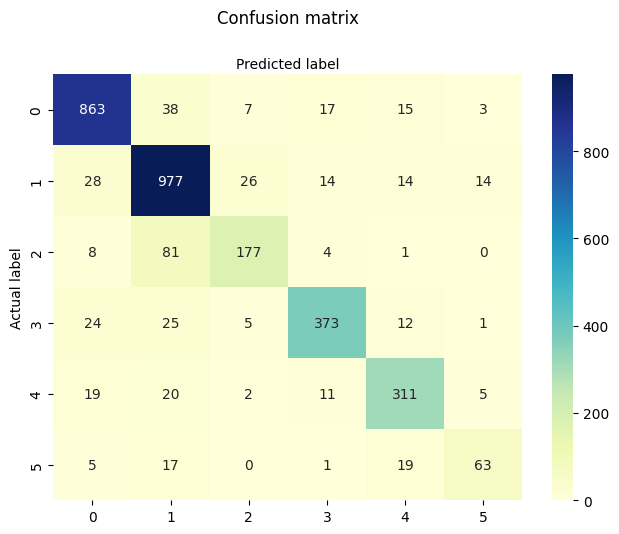

In [55]:
confusion_matrix(cnf_matrix)

In [56]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.92      0.91       943
     Sadness       0.84      0.91      0.88      1073
       Anger       0.82      0.65      0.73       271
        Fear       0.89      0.85      0.87       440
        Love       0.84      0.85      0.84       368
   Surprised       0.73      0.60      0.66       105

    accuracy                           0.86      3200
   macro avg       0.84      0.80      0.81      3200
weighted avg       0.86      0.86      0.86      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [57]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [58]:
y_pred = NB_model(X_train, y_train, X_test)

In [59]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[867  38   6  17  13   2]
 [ 14 995  36   8   9  11]
 [  5  48 216   1   1   0]
 [ 11  23   5 394   7   0]
 [ 11  17   1  10 318  11]
 [  1   6   1   2  14  81]]


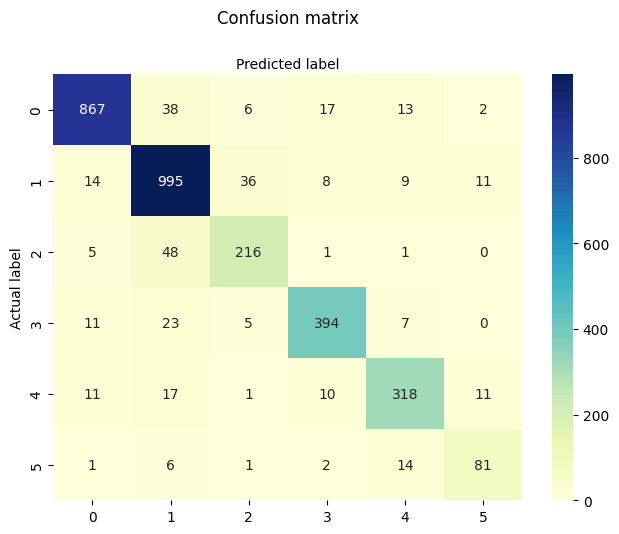

In [60]:
confusion_matrix(cnf_matrix)

In [61]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.92      0.94       943
     Sadness       0.88      0.93      0.90      1073
       Anger       0.82      0.80      0.81       271
        Fear       0.91      0.90      0.90       440
        Love       0.88      0.86      0.87       368
   Surprised       0.77      0.77      0.77       105

    accuracy                           0.90      3200
   macro avg       0.87      0.86      0.87      3200
weighted avg       0.90      0.90      0.90      3200



##### CounterVectorizer -- Bigram(n3)

In [62]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [63]:
y_pred = NB_model(X_train, y_train, X_test)

In [64]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 385  538    5    8    5    2]
 [  21 1038    6    0    2    6]
 [   2  168  100    0    1    0]
 [  19  232    2  184    2    1]
 [  20  138    0    5  202    3]
 [   5   45    0    1   19   35]]


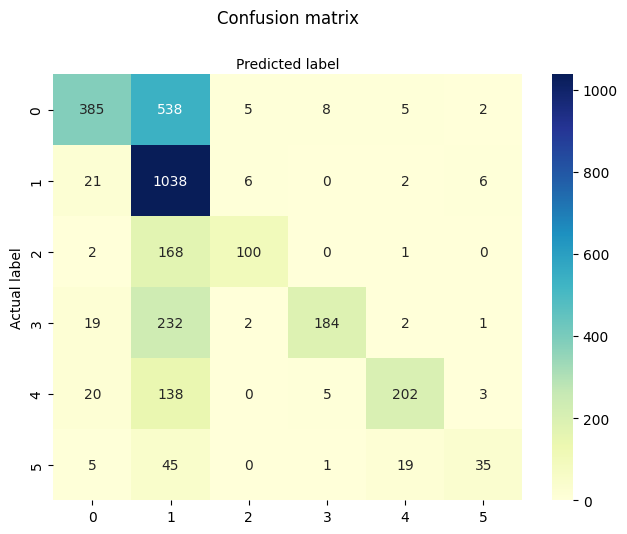

In [65]:
confusion_matrix(cnf_matrix)

In [66]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.85      0.41      0.55       943
     Sadness       0.48      0.97      0.64      1073
       Anger       0.88      0.37      0.52       271
        Fear       0.93      0.42      0.58       440
        Love       0.87      0.55      0.67       368
   Surprised       0.74      0.33      0.46       105

    accuracy                           0.61      3200
   macro avg       0.79      0.51      0.57      3200
weighted avg       0.74      0.61      0.59      3200



##### TfidfVectorizer -- Unigram(n1)

In [67]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [68]:
y_pred = NB_model(X_train, y_train, X_test)

In [69]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 886   47    0    6    3    1]
 [  27 1037    2    6    1    0]
 [  26  143   98    3    1    0]
 [  49   66    1  319    5    0]
 [  51   57    1   14  244    1]
 [  27   49    0    2   17   10]]


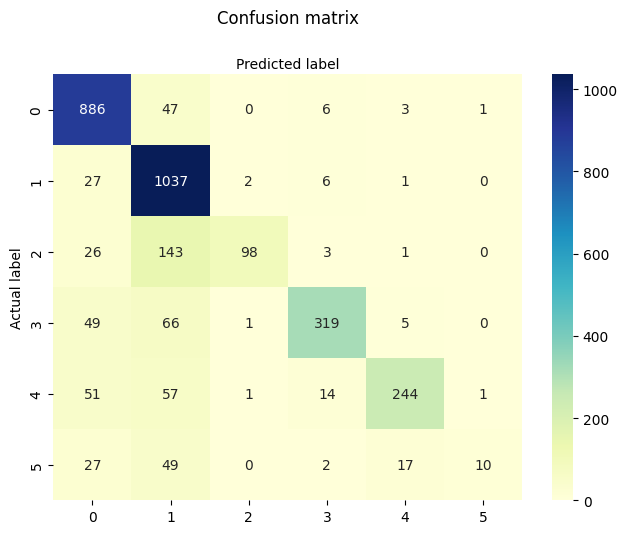

In [70]:
confusion_matrix(cnf_matrix)

In [71]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.83      0.94      0.88       943
     Sadness       0.74      0.97      0.84      1073
       Anger       0.96      0.36      0.53       271
        Fear       0.91      0.72      0.81       440
        Love       0.90      0.66      0.76       368
   Surprised       0.83      0.10      0.17       105

    accuracy                           0.81      3200
   macro avg       0.86      0.63      0.66      3200
weighted avg       0.83      0.81      0.79      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [72]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [73]:
y_pred = NB_model(X_train, y_train, X_test)

In [74]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 857   85    0    1    0    0]
 [  14 1056    0    1    2    0]
 [  18  178   75    0    0    0]
 [  65  114    0  259    2    0]
 [  56   98    0   11  201    2]
 [  16   53    0    1   19   16]]


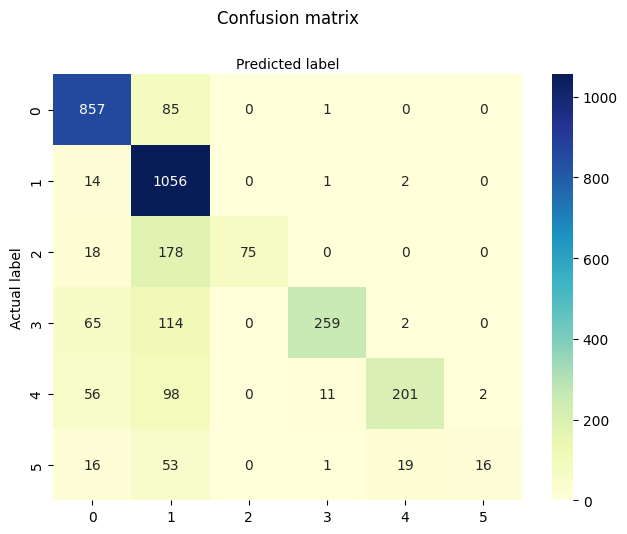

In [75]:
confusion_matrix(cnf_matrix)

In [76]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.84      0.91      0.87       943
     Sadness       0.67      0.98      0.79      1073
       Anger       1.00      0.28      0.43       271
        Fear       0.95      0.59      0.73       440
        Love       0.90      0.55      0.68       368
   Surprised       0.89      0.15      0.26       105

    accuracy                           0.77      3200
   macro avg       0.87      0.58      0.63      3200
weighted avg       0.82      0.77      0.75      3200



##### TfidfVectorizer -- Bigram(n3)





In [77]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [78]:
y_pred = NB_model(X_train, y_train, X_test)

In [79]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 365  577    0    1    0    0]
 [  14 1055    1    1    2    0]
 [   2  232   37    0    0    0]
 [   9  270    0  160    1    0]
 [  20  203    0    7  138    0]
 [   2   85    0    1   14    3]]


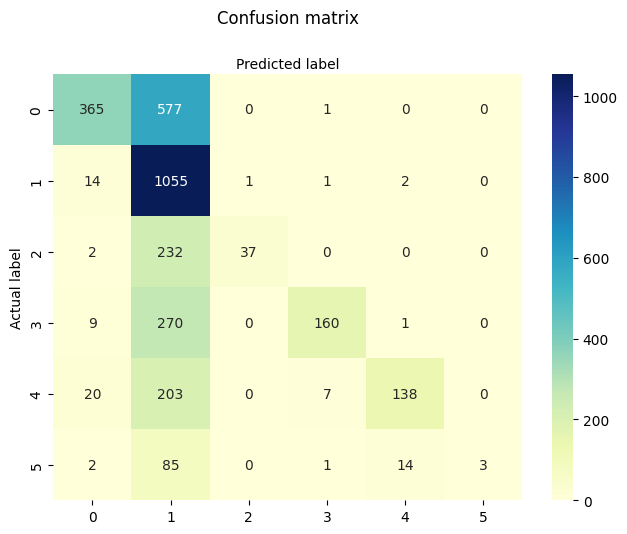

In [80]:
confusion_matrix(cnf_matrix)

In [81]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.39      0.54       943
     Sadness       0.44      0.98      0.60      1073
       Anger       0.97      0.14      0.24       271
        Fear       0.94      0.36      0.52       440
        Love       0.89      0.38      0.53       368
   Surprised       1.00      0.03      0.06       105

    accuracy                           0.55      3200
   macro avg       0.85      0.38      0.41      3200
weighted avg       0.75      0.55      0.52      3200



#### *K-Nearest Neighbor (KNN)*

In [82]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [83]:
def find_optimal_k(X_train, y_train, X_test, y_test):
  # Find the optimal value of k
  max_k = min(15, X_train.shape[0]) # Limit the maximum value of k to avoid overfitting
  best_accuracy = 0
  best_k = 0
  accuracy_values = []
  k_values = []
  for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k = k

  return best_k

In [84]:
def KNN_model(X_train, y_train, X_test, best_k):
  # Train the KNN classifier using the optimal value of k
  scaler = StandardScaler(with_mean=False)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  return y_pred

##### CounterVectorizer - Unigram(n1)

In [85]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [86]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [87]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [88]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[633 134  62  64  34  16]
 [176 647 104  63  52  31]
 [ 60  71 107  16  13   4]
 [ 83  63  39 224  25   6]
 [ 78  63  33  38 138  18]
 [ 14  19   9  12  16  35]]


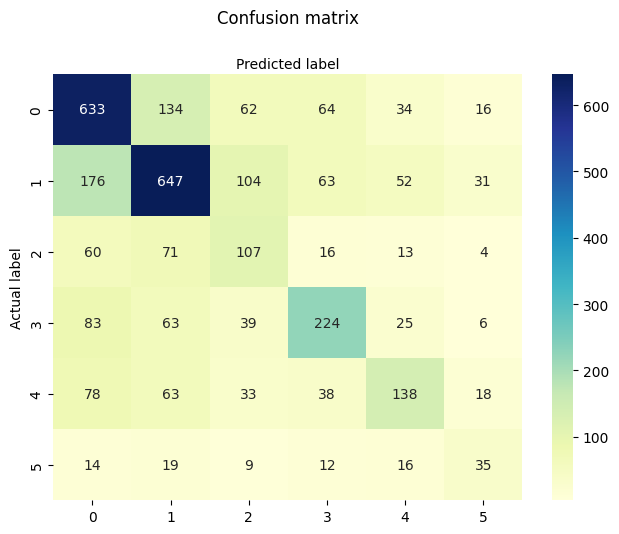

In [89]:
confusion_matrix(cnf_matrix)

In [90]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.61      0.67      0.64       943
     Sadness       0.65      0.60      0.63      1073
       Anger       0.30      0.39      0.34       271
        Fear       0.54      0.51      0.52       440
        Love       0.50      0.38      0.43       368
   Surprised       0.32      0.33      0.33       105

    accuracy                           0.56      3200
   macro avg       0.48      0.48      0.48      3200
weighted avg       0.56      0.56      0.56      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [91]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [92]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [93]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [94]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[656  93  91  59  29  15]
 [300 583 114  40  24  12]
 [ 80  51 116  16   8   0]
 [108  43  54 218  10   7]
 [ 94  28  38  39 157  12]
 [ 16  11  11   7  19  41]]


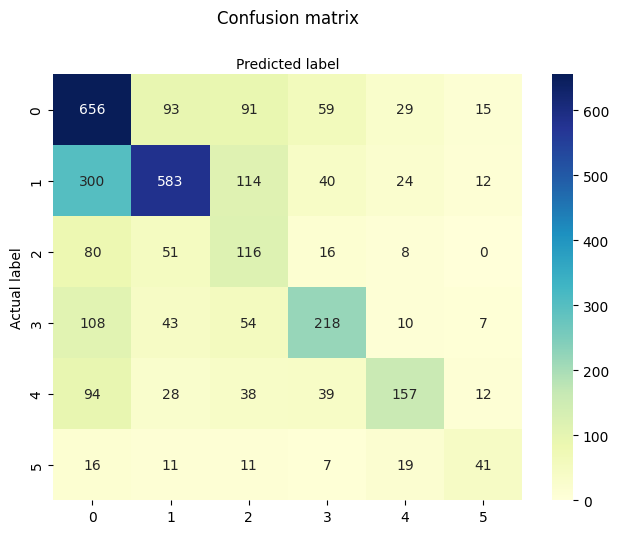

In [95]:
confusion_matrix(cnf_matrix)

In [96]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.52      0.70      0.60       943
     Sadness       0.72      0.54      0.62      1073
       Anger       0.27      0.43      0.33       271
        Fear       0.58      0.50      0.53       440
        Love       0.64      0.43      0.51       368
   Surprised       0.47      0.39      0.43       105

    accuracy                           0.55      3200
   macro avg       0.53      0.50      0.50      3200
weighted avg       0.59      0.55      0.56      3200



##### CounterVectorizer -- Bigram(n3)

In [97]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [98]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [99]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [100]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[577  64  19 268  14   1]
 [218 460  24 358  13   0]
 [ 65  48  56  98   4   0]
 [110  30   7 290   3   0]
 [ 99  28   7 117 111   6]
 [ 25   9   4  46   9  12]]


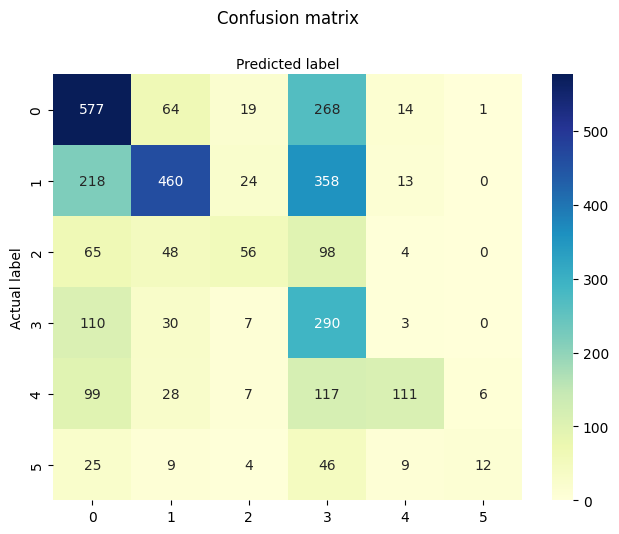

In [101]:
confusion_matrix(cnf_matrix)

In [102]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.53      0.61      0.57       943
     Sadness       0.72      0.43      0.54      1073
       Anger       0.48      0.21      0.29       271
        Fear       0.25      0.66      0.36       440
        Love       0.72      0.30      0.43       368
   Surprised       0.63      0.11      0.19       105

    accuracy                           0.47      3200
   macro avg       0.55      0.39      0.40      3200
weighted avg       0.57      0.47      0.48      3200



##### TfidfVectorizer -- Unigram(n1)

In [103]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [104]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [105]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [106]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[847  58   5  25   8   0]
 [ 81 962  12   4   9   5]
 [ 37 108 119   6   1   0]
 [ 68  52   5 309   5   1]
 [ 42  54   2  12 252   6]
 [ 12  31   2   3  11  46]]


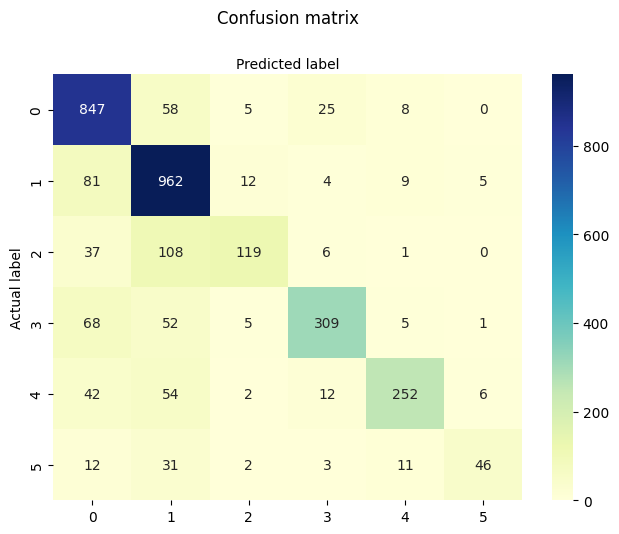

In [107]:
confusion_matrix(cnf_matrix)

In [108]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.78      0.90      0.83       943
     Sadness       0.76      0.90      0.82      1073
       Anger       0.82      0.44      0.57       271
        Fear       0.86      0.70      0.77       440
        Love       0.88      0.68      0.77       368
   Surprised       0.79      0.44      0.56       105

    accuracy                           0.79      3200
   macro avg       0.82      0.68      0.72      3200
weighted avg       0.80      0.79      0.78      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [109]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [110]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [111]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [112]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[852  63   7  17   4   0]
 [138 909  10   5   5   6]
 [ 48  97 115   8   3   0]
 [102  60   2 271   5   0]
 [ 76  44   2  13 229   4]
 [ 23  19   0   1  15  47]]


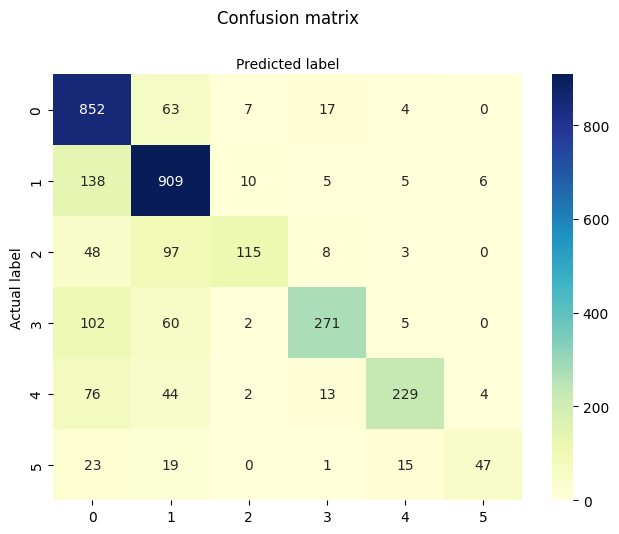

In [113]:
confusion_matrix(cnf_matrix)

In [114]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.69      0.90      0.78       943
     Sadness       0.76      0.85      0.80      1073
       Anger       0.85      0.42      0.57       271
        Fear       0.86      0.62      0.72       440
        Love       0.88      0.62      0.73       368
   Surprised       0.82      0.45      0.58       105

    accuracy                           0.76      3200
   macro avg       0.81      0.64      0.70      3200
weighted avg       0.78      0.76      0.75      3200



##### TfidfVectorizer -- Bigram(n3)

In [115]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [117]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [118]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[668 189   2  61  23   0]
 [102 894   6  54  13   4]
 [ 29 136  79  22   5   0]
 [ 78 114   0 242   6   0]
 [ 53  78   0  28 207   2]
 [ 13  34   2  14  14  28]]


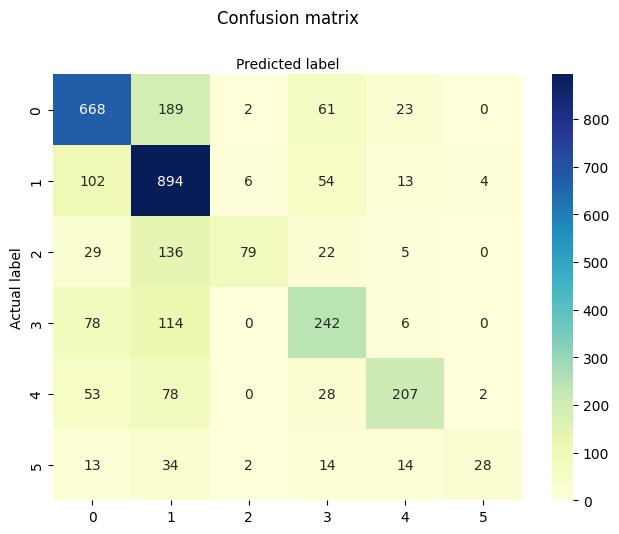

In [119]:
confusion_matrix(cnf_matrix)

In [120]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.71      0.71      0.71       943
     Sadness       0.62      0.83      0.71      1073
       Anger       0.89      0.29      0.44       271
        Fear       0.57      0.55      0.56       440
        Love       0.77      0.56      0.65       368
   Surprised       0.82      0.27      0.40       105

    accuracy                           0.66      3200
   macro avg       0.73      0.54      0.58      3200
weighted avg       0.69      0.66      0.65      3200



#### *Logistic Regression*

In [121]:
# import LR model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [122]:
def LR_model(X_train, y_train, X_test, max_iter=1000):
  # Model Selection & Hyperparameter Tuning
  param_grid = {'C': [0.1, 0.5, 1, 2, 5]}
  logreg = LogisticRegression(random_state=16, max_iter=max_iter)
  grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  y_pred = grid_search.best_estimator_.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [123]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [124]:
y_pred = LR_model(X_train, y_train, X_test)

In [125]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[858  37   4  23  18   3]
 [ 26 977  38   9  11  12]
 [  7  59 201   3   1   0]
 [ 28  23   7 369  10   3]
 [ 19  20   3  13 305   8]
 [  4   7   0   1  20  73]]


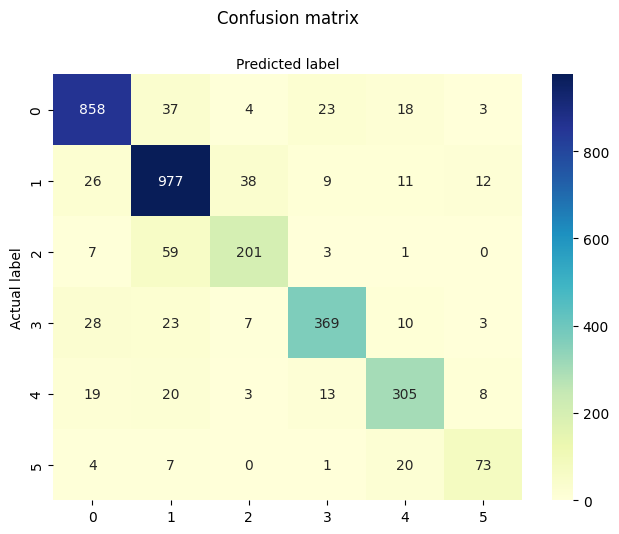

In [126]:
confusion_matrix(cnf_matrix)

In [127]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.91      0.91       943
     Sadness       0.87      0.91      0.89      1073
       Anger       0.79      0.74      0.77       271
        Fear       0.88      0.84      0.86       440
        Love       0.84      0.83      0.83       368
   Surprised       0.74      0.70      0.72       105

    accuracy                           0.87      3200
   macro avg       0.84      0.82      0.83      3200
weighted avg       0.87      0.87      0.87      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [128]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [129]:
y_pred = LR_model(X_train, y_train, X_test)

In [130]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 876   30    3   21   13    0]
 [  20 1001   30    6    4   12]
 [   0   61  207    1    2    0]
 [  28   24    4  375    6    3]
 [  14   17    4   14  309   10]
 [   3    7    0    2   18   75]]


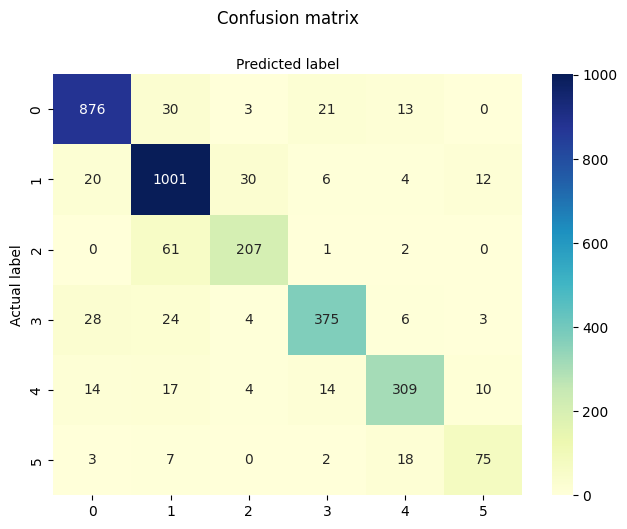

In [131]:
confusion_matrix(cnf_matrix)

In [132]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.93      0.93       943
     Sadness       0.88      0.93      0.90      1073
       Anger       0.83      0.76      0.80       271
        Fear       0.89      0.85      0.87       440
        Love       0.88      0.84      0.86       368
   Surprised       0.75      0.71      0.73       105

    accuracy                           0.89      3200
   macro avg       0.86      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



##### CounterVectorizer -- Bigram(n3)

In [133]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [134]:
y_pred = LR_model(X_train, y_train, X_test)

In [135]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[734 171   5  25   8   0]
 [ 97 934  19  11   8   4]
 [ 26 134 104   4   3   0]
 [ 63 133   2 236   6   0]
 [ 49  74   2  13 225   5]
 [ 17  31   1   1  17  38]]


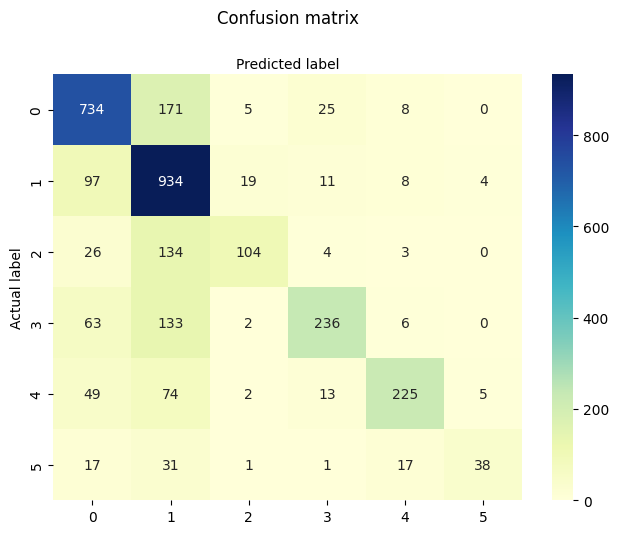

In [136]:
confusion_matrix(cnf_matrix)

In [137]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.74      0.78      0.76       943
     Sadness       0.63      0.87      0.73      1073
       Anger       0.78      0.38      0.51       271
        Fear       0.81      0.54      0.65       440
        Love       0.84      0.61      0.71       368
   Surprised       0.81      0.36      0.50       105

    accuracy                           0.71      3200
   macro avg       0.77      0.59      0.64      3200
weighted avg       0.73      0.71      0.70      3200



##### TfidfVectorizer -- Unigram(n1)

In [138]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [139]:
y_pred = LR_model(X_train, y_train, X_test)

In [140]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[857  43   3  23  15   2]
 [ 27 995  28   8   6   9]
 [  8  76 182   4   1   0]
 [ 32  29   5 366   7   1]
 [ 19  28   2  14 299   6]
 [  9  14   0   3  18  61]]


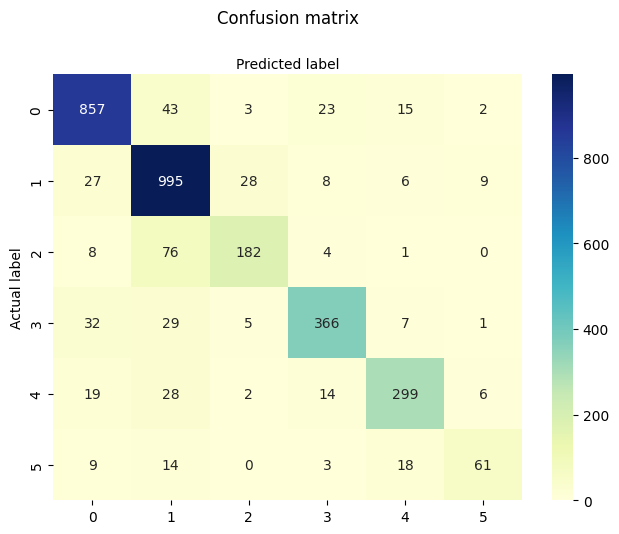

In [141]:
confusion_matrix(cnf_matrix)

In [142]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.91      0.90       943
     Sadness       0.84      0.93      0.88      1073
       Anger       0.83      0.67      0.74       271
        Fear       0.88      0.83      0.85       440
        Love       0.86      0.81      0.84       368
   Surprised       0.77      0.58      0.66       105

    accuracy                           0.86      3200
   macro avg       0.85      0.79      0.81      3200
weighted avg       0.86      0.86      0.86      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [143]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [144]:
y_pred = LR_model(X_train, y_train, X_test)

In [145]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 875   41    2   14   11    0]
 [  19 1027   17    3    2    5]
 [   9   98  159    4    1    0]
 [  41   50    1  342    5    1]
 [  26   50    1   14  271    6]
 [   9   32    0    2   20   42]]


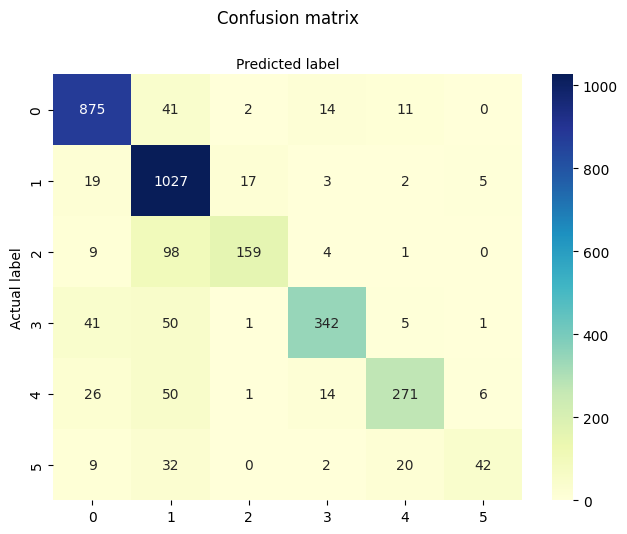

In [146]:
confusion_matrix(cnf_matrix)

In [147]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.93      0.91       943
     Sadness       0.79      0.96      0.87      1073
       Anger       0.88      0.59      0.71       271
        Fear       0.90      0.78      0.84       440
        Love       0.87      0.74      0.80       368
   Surprised       0.78      0.40      0.53       105

    accuracy                           0.85      3200
   macro avg       0.85      0.73      0.77      3200
weighted avg       0.85      0.85      0.84      3200



##### TfidfVectorizer -- Bigram(n3)

In [148]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [149]:
y_pred = LR_model(X_train, y_train, X_test)

In [150]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[715 216   1   9   2   0]
 [ 75 990   5   0   1   2]
 [ 24 186  58   1   2   0]
 [ 64 190   0 183   3   0]
 [ 48 133   0   8 175   4]
 [ 17  57   0   2  16  13]]


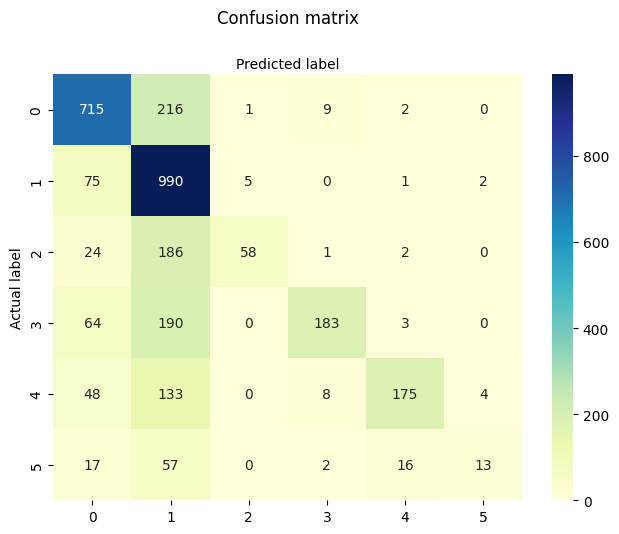

In [151]:
confusion_matrix(cnf_matrix)

In [152]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.76      0.76      0.76       943
     Sadness       0.56      0.92      0.70      1073
       Anger       0.91      0.21      0.35       271
        Fear       0.90      0.42      0.57       440
        Love       0.88      0.48      0.62       368
   Surprised       0.68      0.12      0.21       105

    accuracy                           0.67      3200
   macro avg       0.78      0.49      0.53      3200
weighted avg       0.74      0.67      0.64      3200



#### *Support Vector Machines (SVM)*

In [153]:
# import SVM model
from sklearn import svm

In [154]:
def SVM_model(X_train, y_train, X_test):
  # create a svm Classifier
  svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

  # train the model using the training sets
  svm_classifier.fit(X_train, y_train)

  y_pred = svm_classifier.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [155]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [156]:
y_pred = SVM_model(X_train, y_train, X_test)

In [157]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[843  32   7  32  23   6]
 [ 33 941  44  17  20  18]
 [  5  58 202   4   2   0]
 [ 36  18   8 369   6   3]
 [ 23  11   3  13 310   8]
 [  3   8   0   2  18  74]]


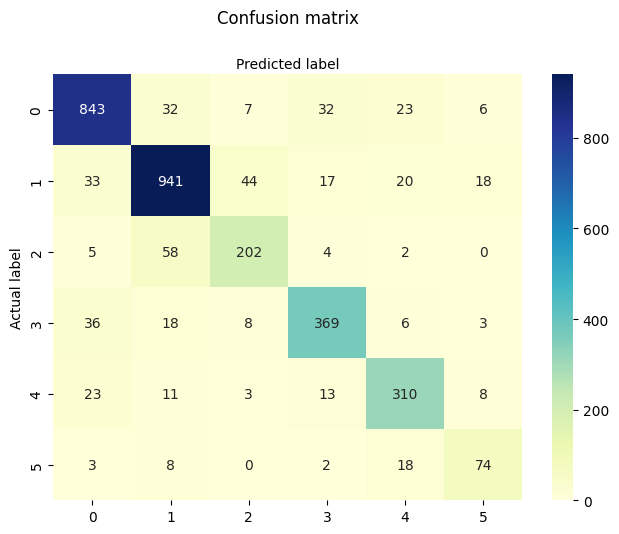

In [158]:
confusion_matrix(cnf_matrix)

In [159]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.89      0.89       943
     Sadness       0.88      0.88      0.88      1073
       Anger       0.77      0.75      0.76       271
        Fear       0.84      0.84      0.84       440
        Love       0.82      0.84      0.83       368
   Surprised       0.68      0.70      0.69       105

    accuracy                           0.86      3200
   macro avg       0.81      0.82      0.82      3200
weighted avg       0.86      0.86      0.86      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [160]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [161]:
y_pred = SVM_model(X_train, y_train, X_test)

In [162]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[865  25   7  25  15   6]
 [ 20 983  32  11  15  12]
 [  1  61 206   1   2   0]
 [ 27  21   2 383   4   3]
 [ 13  10   4  13 316  12]
 [  1   5   1   0  19  79]]


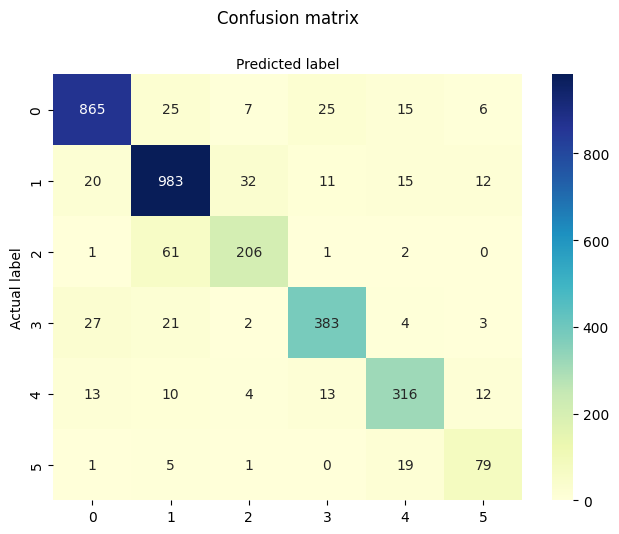

In [163]:
confusion_matrix(cnf_matrix)

In [164]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.92      0.93       943
     Sadness       0.89      0.92      0.90      1073
       Anger       0.82      0.76      0.79       271
        Fear       0.88      0.87      0.88       440
        Love       0.85      0.86      0.86       368
   Surprised       0.71      0.75      0.73       105

    accuracy                           0.89      3200
   macro avg       0.85      0.85      0.85      3200
weighted avg       0.89      0.89      0.88      3200



##### CounterVectorizer -- Bigram(n3)

In [165]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [166]:
y_pred = SVM_model(X_train, y_train, X_test)

In [167]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[734 170   5  25   8   1]
 [103 926  19  14   7   4]
 [ 32 128 103   6   2   0]
 [ 63 133   2 237   5   0]
 [ 48  77   0  14 224   5]
 [ 17  28   1   2  16  41]]


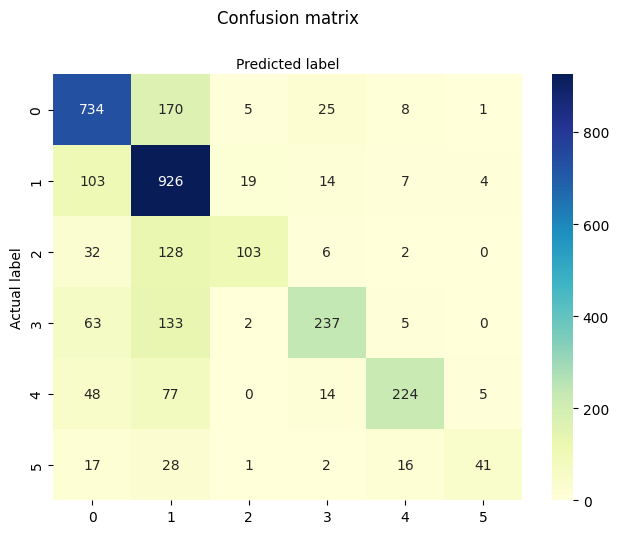

In [168]:
confusion_matrix(cnf_matrix)

In [169]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.74      0.78      0.76       943
     Sadness       0.63      0.86      0.73      1073
       Anger       0.79      0.38      0.51       271
        Fear       0.80      0.54      0.64       440
        Love       0.85      0.61      0.71       368
   Surprised       0.80      0.39      0.53       105

    accuracy                           0.71      3200
   macro avg       0.77      0.59      0.65      3200
weighted avg       0.73      0.71      0.70      3200



##### TfidfVectorizer -- Unigram(n1)

In [170]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [171]:
y_pred = SVM_model(X_train, y_train, X_test)

In [172]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[843  43   8  26  18   5]
 [ 30 985  22  10  14  12]
 [  6  82 179   3   1   0]
 [ 30  18   3 383   3   3]
 [ 16  20   3  19 304   6]
 [  6  14   0   2  20  63]]


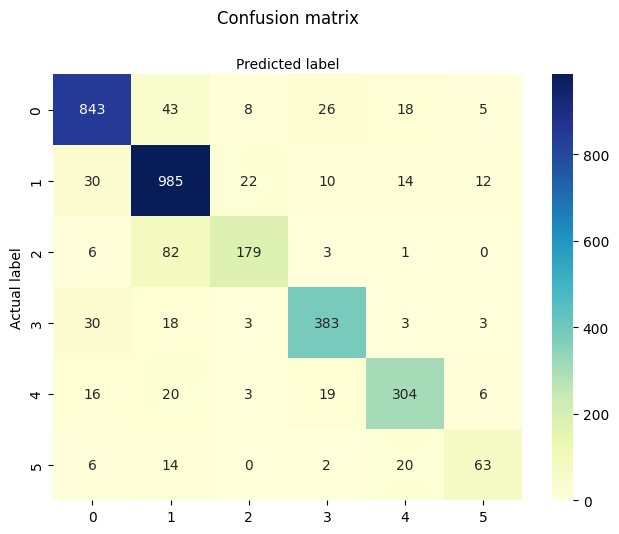

In [173]:
confusion_matrix(cnf_matrix)

In [174]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.89      0.90       943
     Sadness       0.85      0.92      0.88      1073
       Anger       0.83      0.66      0.74       271
        Fear       0.86      0.87      0.87       440
        Love       0.84      0.83      0.84       368
   Surprised       0.71      0.60      0.65       105

    accuracy                           0.86      3200
   macro avg       0.83      0.79      0.81      3200
weighted avg       0.86      0.86      0.86      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [175]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [176]:
y_pred = SVM_model(X_train, y_train, X_test)

In [177]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 877   35    2   18   11    0]
 [  20 1022   14    5    7    5]
 [   5  101  162    3    0    0]
 [  39   48    0  349    3    1]
 [  21   39    0   14  291    3]
 [   8   24    0    1   21   51]]


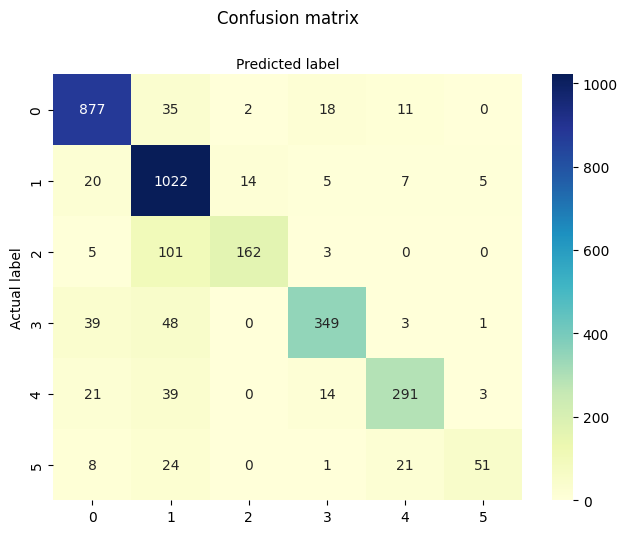

In [178]:
confusion_matrix(cnf_matrix)

In [179]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.93      0.92       943
     Sadness       0.81      0.95      0.87      1073
       Anger       0.91      0.60      0.72       271
        Fear       0.89      0.79      0.84       440
        Love       0.87      0.79      0.83       368
   Surprised       0.85      0.49      0.62       105

    accuracy                           0.86      3200
   macro avg       0.87      0.76      0.80      3200
weighted avg       0.86      0.86      0.86      3200



##### TfidfVectorizer -- Bigram(n3)

In [180]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [181]:
y_pred = SVM_model(X_train, y_train, X_test)

In [182]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[707 225   1   8   2   0]
 [ 70 995   4   1   1   2]
 [ 24 191  55   0   1   0]
 [ 59 200   0 181   0   0]
 [ 53 131   0   7 174   3]
 [ 11  58   0   2  18  16]]


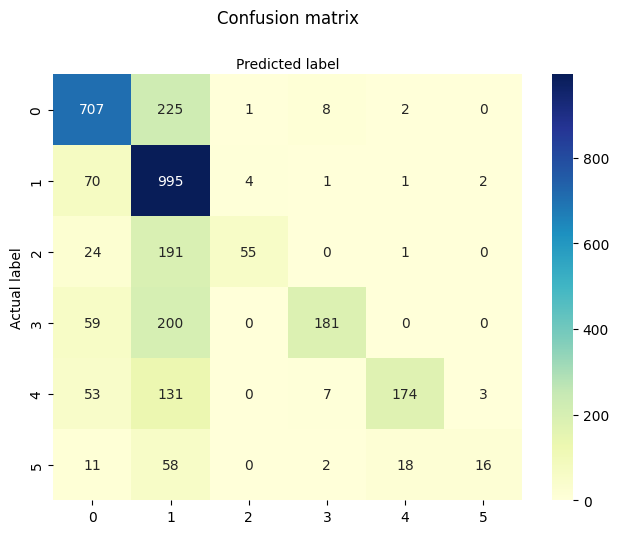

In [183]:
confusion_matrix(cnf_matrix)

In [184]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.77      0.75      0.76       943
     Sadness       0.55      0.93      0.69      1073
       Anger       0.92      0.20      0.33       271
        Fear       0.91      0.41      0.57       440
        Love       0.89      0.47      0.62       368
   Surprised       0.76      0.15      0.25       105

    accuracy                           0.67      3200
   macro avg       0.80      0.49      0.54      3200
weighted avg       0.74      0.67      0.64      3200



#### *Decision Tree*

In [185]:
# import DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [186]:
def DT_model(X_train, y_train, X_test):
  # define the parameter grid
  param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

  # create a decision tree classifier
  dt = DecisionTreeClassifier()

  # perform grid search
  grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # get the best parameters
  best_params = grid_search.best_params_

  # train the model using the best parameters
  dt = DecisionTreeClassifier(max_depth=best_params['max_depth'])
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [187]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [188]:
y_pred = DT_model(X_train, y_train, X_test)

In [189]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[797  40  15  45  37   9]
 [ 51 895  62  23  26  16]
 [  3  61 201   3   2   1]
 [ 20  18   4 388   8   2]
 [ 12   9   2  20 316   9]
 [  5   8   1   1  16  74]]


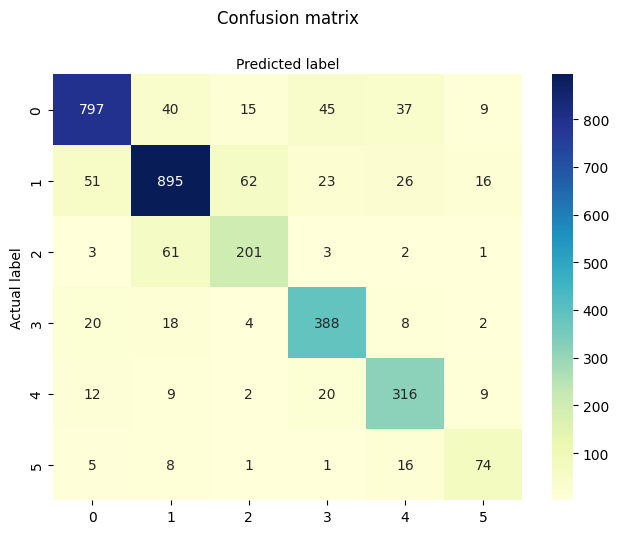

In [190]:
confusion_matrix(cnf_matrix)

In [191]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.85      0.87       943
     Sadness       0.87      0.83      0.85      1073
       Anger       0.71      0.74      0.72       271
        Fear       0.81      0.88      0.84       440
        Love       0.78      0.86      0.82       368
   Surprised       0.67      0.70      0.69       105

    accuracy                           0.83      3200
   macro avg       0.79      0.81      0.80      3200
weighted avg       0.84      0.83      0.84      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [192]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [193]:
y_pred = DT_model(X_train, y_train, X_test)

In [194]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[825  23   8  44  36   7]
 [ 54 899  52  25  27  16]
 [  1  52 213   3   2   0]
 [ 30  12   5 382   8   3]
 [ 12   4   1  21 317  13]
 [  5   9   0   1  13  77]]


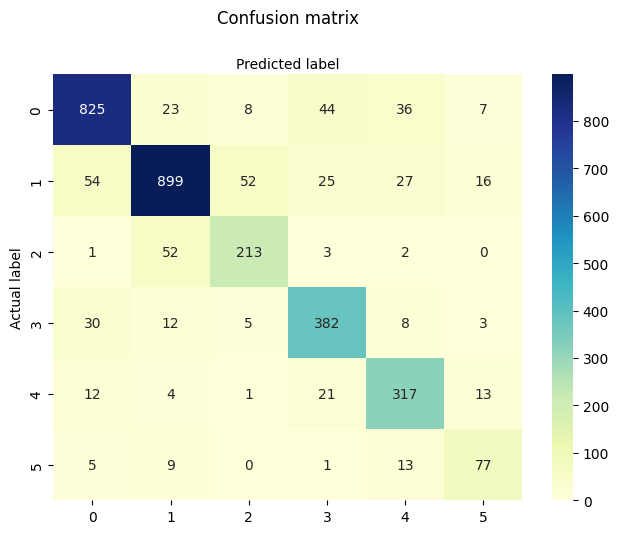

In [195]:
confusion_matrix(cnf_matrix)

In [196]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.87      0.88       943
     Sadness       0.90      0.84      0.87      1073
       Anger       0.76      0.79      0.77       271
        Fear       0.80      0.87      0.83       440
        Love       0.79      0.86      0.82       368
   Surprised       0.66      0.73      0.70       105

    accuracy                           0.85      3200
   macro avg       0.80      0.83      0.81      3200
weighted avg       0.85      0.85      0.85      3200



##### CounterVectorizer -- Bigram(n3)

In [197]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [198]:
y_pred = DT_model(X_train, y_train, X_test)

In [199]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[666 159  19  76  19   4]
 [ 92 745  39 172  14  11]
 [ 16  89 129  28   8   1]
 [ 43  91   6 287  13   0]
 [ 38  60   3  41 215  11]
 [ 11  18   1  14  14  47]]


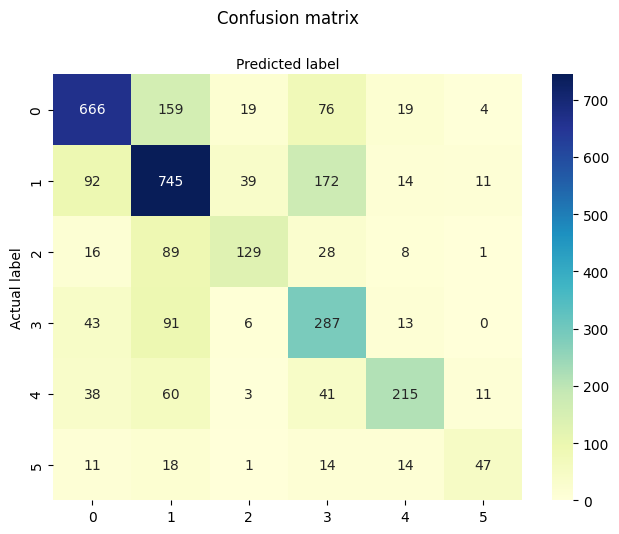

In [200]:
confusion_matrix(cnf_matrix)

In [201]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.77      0.71      0.74       943
     Sadness       0.64      0.69      0.67      1073
       Anger       0.65      0.48      0.55       271
        Fear       0.46      0.65      0.54       440
        Love       0.76      0.58      0.66       368
   Surprised       0.64      0.45      0.53       105

    accuracy                           0.65      3200
   macro avg       0.65      0.59      0.61      3200
weighted avg       0.67      0.65      0.66      3200



##### TfidfVectorizer -- Unigram(n1)

In [202]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [203]:
y_pred = DT_model(X_train, y_train, X_test)

In [204]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[795  53  17  36  33   9]
 [ 57 896  53  24  26  17]
 [ 11  68 184   6   2   0]
 [ 22  22   4 374  16   2]
 [ 12   9   4  14 322   7]
 [  7   7   0   1  21  69]]


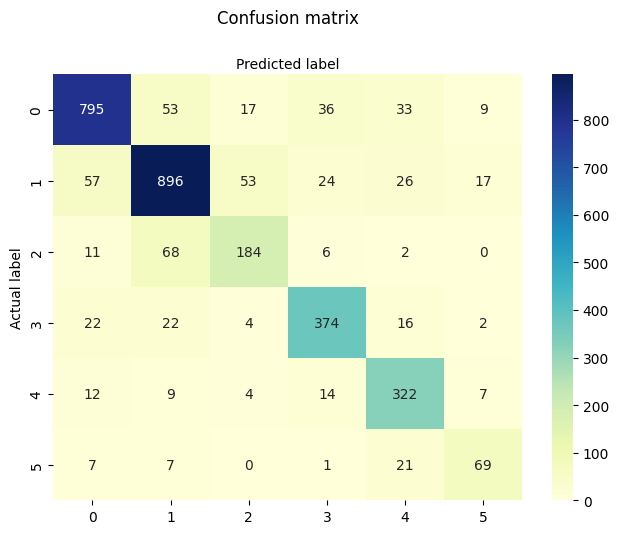

In [205]:
confusion_matrix(cnf_matrix)

In [206]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.88      0.84      0.86       943
     Sadness       0.85      0.84      0.84      1073
       Anger       0.70      0.68      0.69       271
        Fear       0.82      0.85      0.84       440
        Love       0.77      0.88      0.82       368
   Surprised       0.66      0.66      0.66       105

    accuracy                           0.82      3200
   macro avg       0.78      0.79      0.78      3200
weighted avg       0.83      0.82      0.83      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [207]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [208]:
y_pred = DT_model(X_train, y_train, X_test)

In [209]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[820  31  14  38  32   8]
 [ 53 916  43  23  23  15]
 [  2  74 187   5   2   1]
 [ 22  19   4 374  20   1]
 [ 12  11   1  17 318   9]
 [  6   6   0   3  17  73]]


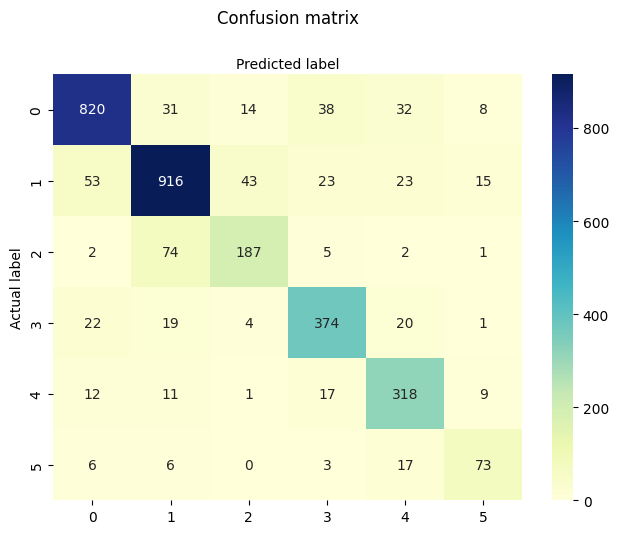

In [210]:
confusion_matrix(cnf_matrix)

In [211]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.87      0.88       943
     Sadness       0.87      0.85      0.86      1073
       Anger       0.75      0.69      0.72       271
        Fear       0.81      0.85      0.83       440
        Love       0.77      0.86      0.82       368
   Surprised       0.68      0.70      0.69       105

    accuracy                           0.84      3200
   macro avg       0.80      0.80      0.80      3200
weighted avg       0.84      0.84      0.84      3200



##### TfidfVectorizer -- Bigram(n3)

In [212]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [213]:
y_pred = DT_model(X_train, y_train, X_test)

In [214]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[625 153  15 113  31   6]
 [121 710  28 186  18  10]
 [ 32  82 109  37   9   2]
 [ 71  69   5 277  15   3]
 [ 47  50   5  47 210   9]
 [ 12  21   2  12  17  41]]


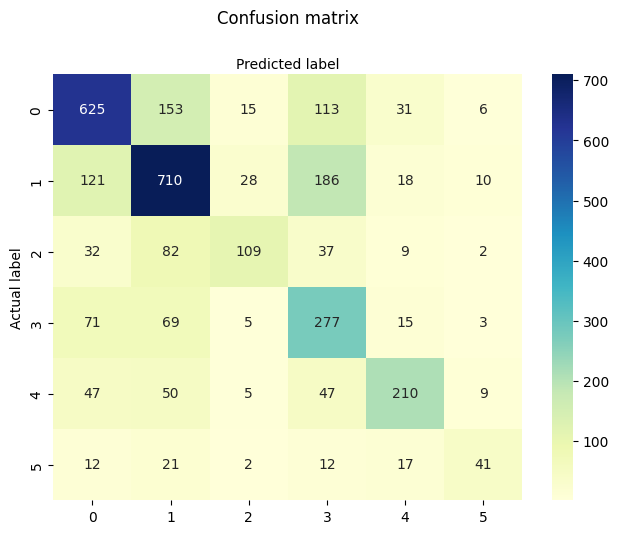

In [215]:
confusion_matrix(cnf_matrix)

In [216]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.69      0.66      0.68       943
     Sadness       0.65      0.66      0.66      1073
       Anger       0.66      0.40      0.50       271
        Fear       0.41      0.63      0.50       440
        Love       0.70      0.57      0.63       368
   Surprised       0.58      0.39      0.47       105

    accuracy                           0.62      3200
   macro avg       0.62      0.55      0.57      3200
weighted avg       0.63      0.62      0.62      3200



#### *Random Forest*

In [217]:
# import RF model
from sklearn.ensemble import RandomForestClassifier

In [218]:
def RF_model(X_train, y_train, X_test):
  # instantiate the model
  rf = RandomForestClassifier()

  # fit the model with data
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [219]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_lem)

In [220]:
y_pred = RF_model(X_train, y_train, X_test)

In [221]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[831  25  13  40  27   7]
 [ 28 945  47  16  18  19]
 [  5  66 194   4   2   0]
 [ 14  19   4 394   7   2]
 [  9  10   3  16 319  11]
 [  2   4   0   2  15  82]]


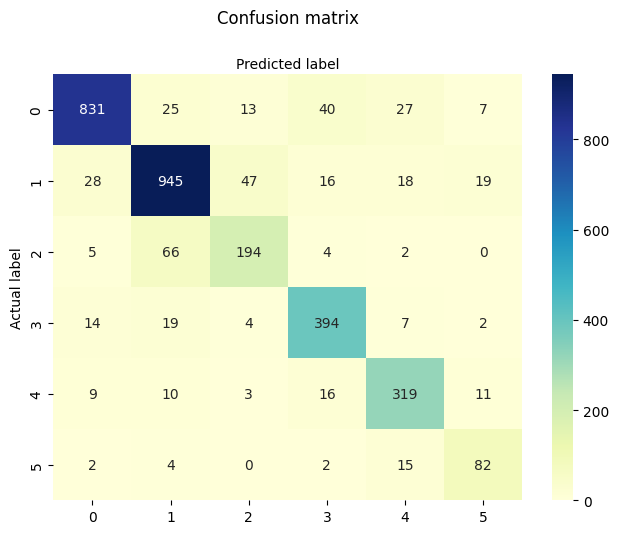

In [222]:
confusion_matrix(cnf_matrix)

In [223]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.88      0.91       943
     Sadness       0.88      0.88      0.88      1073
       Anger       0.74      0.72      0.73       271
        Fear       0.83      0.90      0.86       440
        Love       0.82      0.87      0.84       368
   Surprised       0.68      0.78      0.73       105

    accuracy                           0.86      3200
   macro avg       0.82      0.84      0.83      3200
weighted avg       0.87      0.86      0.86      3200



##### CounterVectorizer -- Unigram and Bigram(n2)



In [224]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_lem)

In [225]:
y_pred = RF_model(X_train, y_train, X_test)

In [226]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[869  33   4  24  13   0]
 [ 22 989  28  12  11  11]
 [  3  68 195   3   2   0]
 [ 14  27   3 392   4   0]
 [ 10  12   2  15 317  12]
 [  3   7   0   0  12  83]]


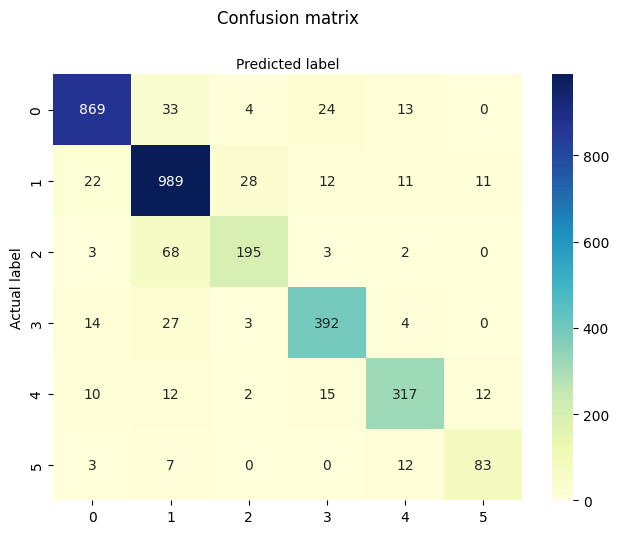

In [227]:
confusion_matrix(cnf_matrix)

In [228]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.94      0.92      0.93       943
     Sadness       0.87      0.92      0.90      1073
       Anger       0.84      0.72      0.78       271
        Fear       0.88      0.89      0.88       440
        Love       0.88      0.86      0.87       368
   Surprised       0.78      0.79      0.79       105

    accuracy                           0.89      3200
   macro avg       0.87      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200



##### CounterVectorizer -- Bigram(n3)

In [229]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_lem)

In [230]:
y_pred = RF_model(X_train, y_train, X_test)

In [231]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[626 196  12  92  17   0]
 [ 48 808  23 181   6   7]
 [  9 120 111  29   2   0]
 [ 41 113   0 282   3   1]
 [ 28  80   1  40 210   9]
 [ 12  20   1  12  10  50]]


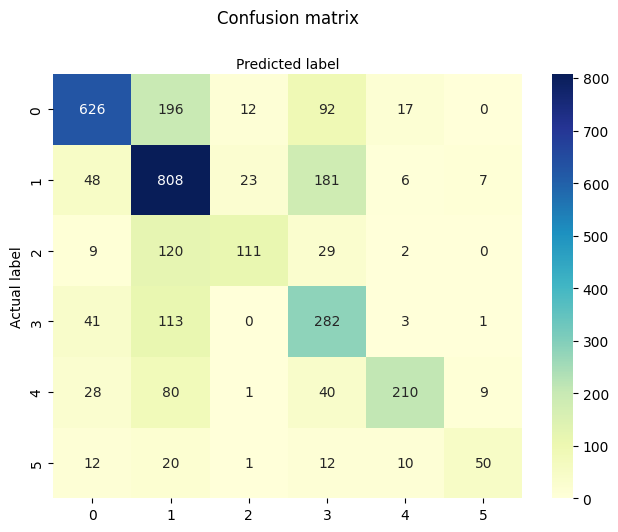

In [232]:
confusion_matrix(cnf_matrix)

In [233]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.82      0.66      0.73       943
     Sadness       0.60      0.75      0.67      1073
       Anger       0.75      0.41      0.53       271
        Fear       0.44      0.64      0.52       440
        Love       0.85      0.57      0.68       368
   Surprised       0.75      0.48      0.58       105

    accuracy                           0.65      3200
   macro avg       0.70      0.59      0.62      3200
weighted avg       0.69      0.65      0.66      3200



##### TfidfVectorizer -- Unigram(n1)

In [234]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_lem)

In [235]:
y_pred = RF_model(X_train, y_train, X_test)

In [236]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[835  40   9  26  29   4]
 [ 30 967  30  13  16  17]
 [  2  85 177   5   2   0]
 [ 12  35   2 377  13   1]
 [  9  19   2  12 320   6]
 [  4   6   0   3  22  70]]


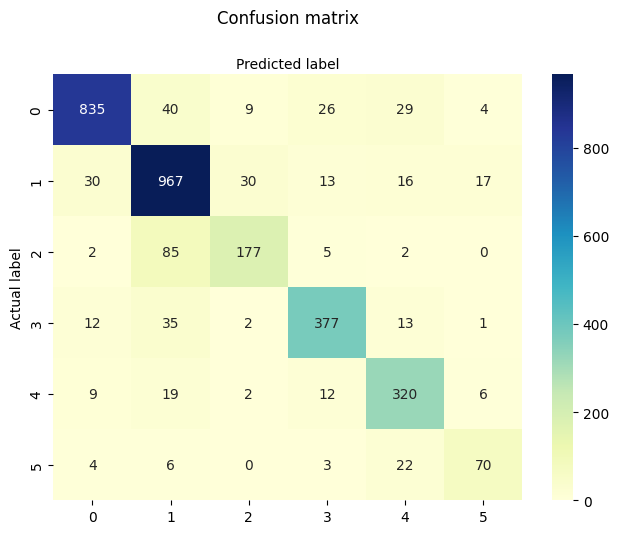

In [237]:
confusion_matrix(cnf_matrix)

In [238]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.94      0.89      0.91       943
     Sadness       0.84      0.90      0.87      1073
       Anger       0.80      0.65      0.72       271
        Fear       0.86      0.86      0.86       440
        Love       0.80      0.87      0.83       368
   Surprised       0.71      0.67      0.69       105

    accuracy                           0.86      3200
   macro avg       0.83      0.81      0.81      3200
weighted avg       0.86      0.86      0.86      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [239]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_lem)

In [240]:
y_pred = RF_model(X_train, y_train, X_test)

In [241]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 859   54    5   13   12    0]
 [  18 1018   14    9    8    6]
 [   1   88  177    3    2    0]
 [  16   31    2  379   12    0]
 [  17   31    2   11  302    5]
 [   2   14    0    3   21   65]]


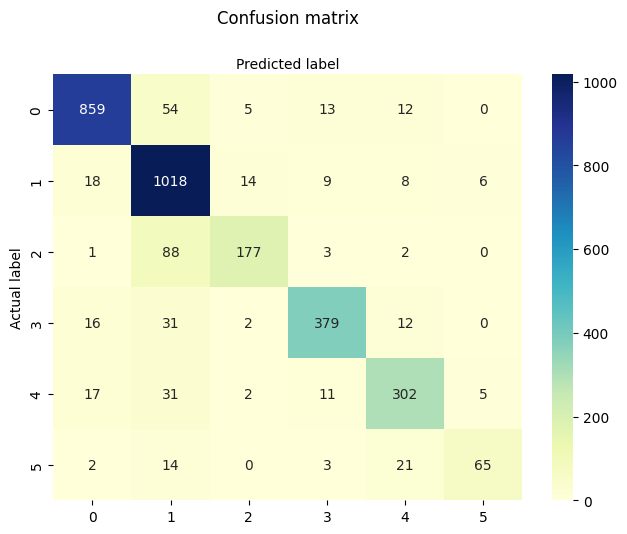

In [242]:
confusion_matrix(cnf_matrix)

In [243]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.94      0.91      0.93       943
     Sadness       0.82      0.95      0.88      1073
       Anger       0.89      0.65      0.75       271
        Fear       0.91      0.86      0.88       440
        Love       0.85      0.82      0.83       368
   Surprised       0.86      0.62      0.72       105

    accuracy                           0.88      3200
   macro avg       0.88      0.80      0.83      3200
weighted avg       0.88      0.88      0.87      3200



##### TfidfVectorizer -- Bigram(n3)

In [244]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_lem)

In [245]:
y_pred = RF_model(X_train, y_train, X_test)

In [246]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[605 230   2  95  11   0]
 [ 48 839  13 162   6   5]
 [  9 126 102  32   2   0]
 [ 38 124   0 276   2   0]
 [ 22  88   0  41 212   5]
 [  8  26   0  13  15  43]]


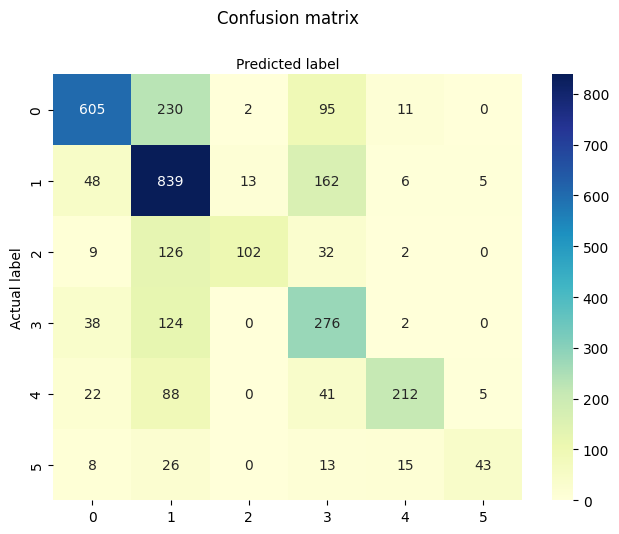

In [247]:
confusion_matrix(cnf_matrix)

In [248]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.83      0.64      0.72       943
     Sadness       0.59      0.78      0.67      1073
       Anger       0.87      0.38      0.53       271
        Fear       0.45      0.63      0.52       440
        Love       0.85      0.58      0.69       368
   Surprised       0.81      0.41      0.54       105

    accuracy                           0.65      3200
   macro avg       0.73      0.57      0.61      3200
weighted avg       0.70      0.65      0.65      3200

